<a href="https://colab.research.google.com/github/LEEYOENN/ArtificialNeural-Network-Deep-Learning/blob/main/week9_pima_indians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/content/pima-indians-diabetes3.csv')
print(df)

     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4      

In [ ]:
##Dataframe (데이터 프레임) <--2차원 표형태
##Series(시리즈) <-- 1차원 벡터형태

df.head(3)
df.tail(3)
list(df.columns)

print(df.corr())
df['diabetes'].value_counts()
#class imblance problem(클래스(레이블) 불균형 문제)

           pregnant    plasma  pressure  thickness   insulin       bmi  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
bmi        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
diabetes   0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age  diabetes  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
bmi    

0    500
1    268
Name: diabetes, dtype: int64

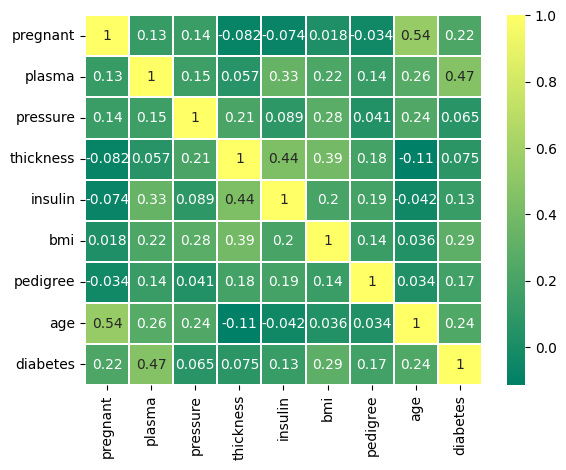

In [ ]:
##히트 맵 (Heat Map)
#color map -> cm
colormap = plt.cm.summer
plt.figure()
sns.heatmap(df.corr(), cmap=colormap, linecolor='white', linewidths=0.2, annot=True)
plt.show()

In [ ]:

x = df[df.columns[0:8]]
y = df[df.columns[8]]



In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x,y, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
154/154 [==============================] - 7s 3ms/step - loss: 0.9408 - accuracy: 0.5964
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6445
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6615
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6745
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6901
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.6901
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.6901
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6940
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6953
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5859 - accura

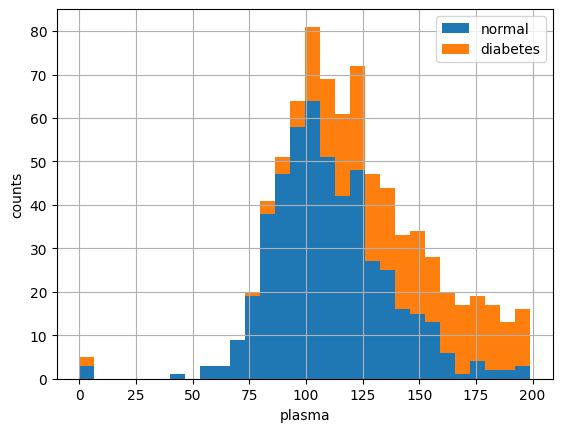

In [ ]:
plt.figure()
plt.hist(x=[df['plasma'][df.diabetes == 0], df['plasma'][df.diabetes==1]],
         bins=30,
         histtype='barstacked',
         label=['normal', 'diabetes'])
plt.legend()
plt.grid(True)
plt.xlabel('plasma')
plt.ylabel("counts")
plt.show()
